In [2]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
bc = pd.read_csv('breast_cancer_table.csv')

In [4]:
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [5]:
bc = bc.drop(labels=["id",'Unnamed: 32'],axis=1)

In [6]:
def makedummies(diagnosis):
    if str(diagnosis) == "M":
        return 1
    else:
        return 0

In [7]:
bc["diagnosis"] = bc["diagnosis"].apply(makedummies)

In [8]:
train,test = sk.model_selection.train_test_split(bc)

In [9]:
Y_train = train['diagnosis']
Y_train = np.asarray(Y_train)
X_train = train.drop('diagnosis', 1)
X_train = np.asarray(X_train)

Y_test = test['diagnosis']
Y_test = np.asarray(Y_test)
X_test = test.drop('diagnosis', 1)
X_test = np.asarray(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
max_accuracy = 0

random_state_list = []
accuracy_list = []

for x in range(200):
    random_state = 10*x
    rf = RandomForestClassifier(random_state=10*x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    
    random_state_list.append(random_state)
    accuracy_list.append(current_accuracy)
    
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)
print(best_x)
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score we have achieved using Decision Tree is: "+str(score_rf)+" %")

96.5
36
The accuracy score we have achieved using Decision Tree is: 95.8 %


Text(0, 0.5, 'Accuracy')

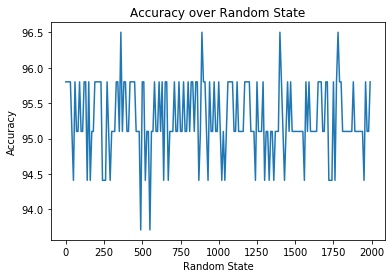

In [11]:
plt.plot(random_state_list,accuracy_list)

plt.title("Accuracy over Random State")
plt.xlabel('Random State')
plt.ylabel('Accuracy')

Looks like the number of classifiers does not make much of a difference

Convolutional Neural Network:

In [12]:
for col in bc.columns:
    bc[col] = bc[col]/max(bc[col])

train,test = sk.model_selection.train_test_split(bc)

    
Y_train = train['diagnosis']
Y_train = np.asarray(Y_train)
X_train = train.drop('diagnosis', 1)
X_train = np.asarray(X_train)

Y_test = test['diagnosis']
Y_test = np.asarray(Y_test)
X_test = test.drop('diagnosis', 1)
X_test = np.asarray(X_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=30))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=100)

Epoch 1/10
5/5 [==============================] - 1s 39ms/step - loss: 0.6903 - accuracy: 0.5634 - val_loss: 0.6609 - val_accuracy: 0.7483
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6583 - accuracy: 0.6737 - val_loss: 0.6292 - val_accuracy: 0.6923
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6318 - accuracy: 0.6549 - val_loss: 0.6014 - val_accuracy: 0.7552
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6082 - accuracy: 0.6901 - val_loss: 0.5752 - val_accuracy: 0.8182
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5853 - accuracy: 0.7606 - val_loss: 0.5509 - val_accuracy: 0.8811
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.5627 - accuracy: 0.8310 - val_loss: 0.5266 - val_accuracy: 0.9021
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5410 - accuracy: 0.8521 - val_loss: 0.5026 - val_accuracy: 0.9091
Epoch 8/10
5/5 [================

So far the random forest is winning

In [15]:
from sklearn.pipeline import Pipeline

In [33]:
scores = []
for neighbors in range(1,len(X_test)): #from one to max neighbors
    kpipe=Pipeline(steps=[
            ("model",sk.neighbors.KNeighborsClassifier(neighbors))
    ])
    kpipe.fit(X_train,Y_train)
    score=kpipe.score(X_test,Y_test)
    scores.append(score)

Text(0.5, 1.0, 'K-Nearest Neighbor Score')

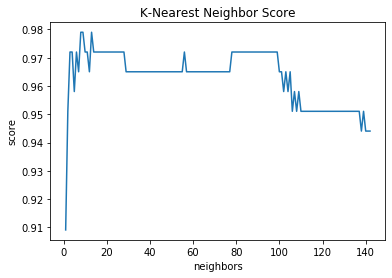

In [40]:
plt.plot(range(1,len(X_test)),scores)
plt.xlabel("neighbors")
plt.ylabel("score")
plt.title("K-Nearest Neighbor Score")

### We find that a K-NN approach is more accurrate than the sequential or random forest algorithms. We achieve an approximately 97% accurracy with the NN approach between 1 and 20 neighbors. This indicates that if there is a set of parameters that predicts malignant/beneign tumours for one person, it is very likely to also predict that for another person.

### I am curious of how that remaining 1.4% slipped through the cracks. I wonder if the random forest learner would have been capable of detecting the subtlties that predict malignant/benign tumours for those who have less typical presentations.